In [ ]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

#my functions
from Plot import plot_img, plot_cv
from Mask import segment_image

In [2]:
path = "../Data/hand.jpg"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img.shape

(400, 714)

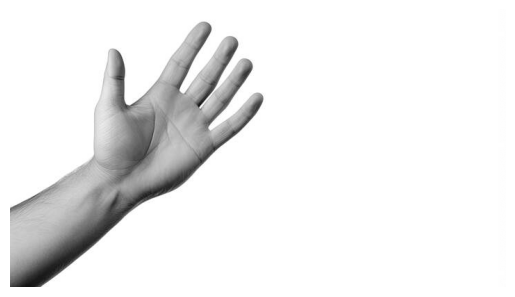

In [3]:
plot_img(img)

Height: 400, Width: 714
The area of the image in pixels are: 231418


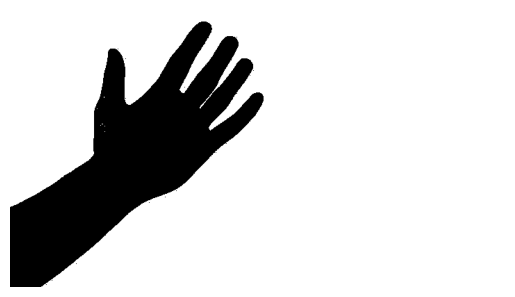

In [4]:
thres = segment_image(img, 240)
plot_img(thres)

In [5]:
plot_cv(thres)

## Moore-Neighbor Tracing Algorithm

<center>

| idx | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| Dir | N   | NE  | E   | SE  | S   | SW  | W   | NW  |
| Nei | (-1,0) | (-1,1) | (0,1) | (1,1) | (1,0) | (1,-1) | (0,-1) | (-1,-1) |

North (N), East (E), South (S), and West (W)

</center>

<center>
    <img src="https://ichef.bbci.co.uk/images/ic/976xn/p09sz63m.jpg" alt="Cardinal Points" width="300"/>
</center>


In [6]:
neighbors = [(-1, 0), (-1, 1), (0, 1), (1, 1),
             (1, 0), (1, -1), (0, -1), (-1, -1)]

def find_start(img):
    height, width = img.shape 
    for i in range(height):
        for j in range(width):
            if img[i, j] == 0:
                return (i, j)
    return None

def find_contour(img):
    height, width = img.shape 

    start = find_start(img)
    if start is None:
        return []
    
    n_search = 8
    contour = [start]
    current = start
    prev_dir = 7

    while 1:
        found = False

        for i in range(n_search):
            idx = (prev_dir + i) % n_search
            dx, dy = neighbors[idx]
            neigh_i, neigh_j = current[0] + dx, current[1] + dy 

            if (0 <= neigh_i < height) and (0 <= neigh_j < width):
                if img[neigh_i, neigh_j] == 0: 
                    contour.append((neigh_i, neigh_j))
                    current = (neigh_i, neigh_j)
                    prev_dir = (idx + 5) % n_search
                    found = True
                    break

        if not found or current == start:
            break
    return contour

In [7]:
contour = find_contour(thres)
contour_xy = [(x,y) for (y,x) in contour]
contour_np = np.array(contour_xy, dtype=np.int32).reshape((-1,1,2))

We need to use this, 'cause we save the contour points like (row, column) = (y, x) and, in OpenCV drawContours is waiting (x, y) = (column, row)

OpenCV expects the points in the shape (n_points, 1, 2), where n_points is the number of points, 1 is the extra dimension, and 2 corresponds to the (x, y) coordinates.

The reshape((-1, 1, 2)) function works by automatically calculating the number of rows (using -1), adding an extra dimension (1), and formatting the points as 2D coordinates (x, y).

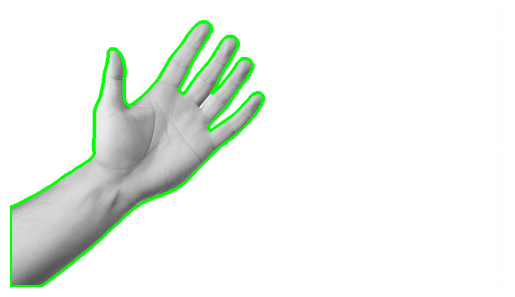

In [8]:
img_out = cv.cvtColor(img.copy(), cv.COLOR_GRAY2BGR)

cv.drawContours(img_out, contour_np, -1, (0, 255, 0), 3)
plot_img(img_out)

In [9]:
plot_cv(img_out)